In [115]:
import pandas as pd

df = pd.read_csv("../data/spotify-tracks-audio-features.csv")
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,class
0,0.000429,0.412,375627,0.655,0.048700,2,0.2900,-8.931,1,0.0538,88.573,4,0.102,6.0
1,0.995000,0.628,178525,0.156,0.234000,2,0.1090,-15.720,1,0.0960,135.022,1,0.366,2.0
2,0.296000,0.536,197232,0.552,0.000052,0,0.1040,-8.267,1,0.0365,112.016,4,0.182,9.0
3,0.000307,0.414,263077,0.852,0.002440,3,0.0953,-8.666,1,0.0817,129.963,3,0.118,8.0
4,0.766000,0.597,203613,0.271,0.011900,5,0.0933,-17.293,1,0.0394,76.271,4,0.338,0.0


In [116]:
columns = df.columns
dataset = df.values
m, n = dataset.shape
lcol_i = n-1
x, y = dataset[:,:lcol_i],  dataset[:, lcol_i]

In [117]:
import numpy as np

for i in range(lcol_i):
    xi = x[:, i]
    rho = np.corrcoef(xi, y)
    rho_val = rho[0, 1]
    if abs(rho_val) > .15:
        print(f"Column '{columns[i]}' with coef: {rho_val:.3f}")

Column 'acousticness' with coef: -0.191
Column 'energy' with coef: 0.178
Column 'loudness' with coef: 0.160


In [118]:
from scipy.stats import spearmanr

selected_columns = []

for i in range(lcol_i):
    xi = x[:, i]
    coef, p = spearmanr(xi, y)
    alpha = 0.05
    if p <= alpha and abs(coef) > .15:
        selected_columns.append(columns[i])
        print(f"Column '{columns[i]}' with coef: {coef:.3f}")

Column 'acousticness' with coef: -0.220
Column 'energy' with coef: 0.191
Column 'loudness' with coef: 0.180


[4.29e-04 9.95e-01 2.96e-01 ... 1.72e-01 9.11e-01 2.73e-06] [ 6.  2.  9. ...  5.  1. 10.]
[0.655 0.156 0.552 ... 0.562 0.147 0.857] [ 6.  2.  9. ...  5.  1. 10.]
[ -8.931 -15.72   -8.267 ...  -5.474 -19.74   -5.133] [ 6.  2.  9. ...  5.  1. 10.]


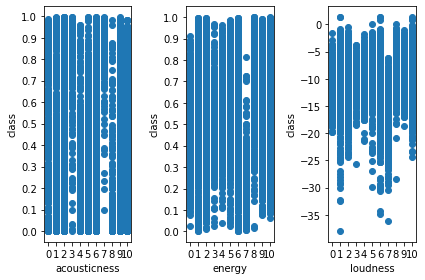

In [119]:
import matplotlib.pyplot as plt
from math import *

cols = 3
rows = ceil(len(selected_columns) / cols)

fig, ax = plt.subplots(rows, cols)

for i in range(cols):
    column = selected_columns[i]
    dataset = df[[column, "class"]].values
    xi, yi = dataset[:, 0], dataset[:, 1]
    axi: plt.Axes = ax[i]
    axi.scatter(yi, xi)
    axi.locator_params(nbins=11)
    axi.set_xlabel(column)
    axi.set_ylabel('class')
    print(xi, yi)

plt.tight_layout()